First few rows of the dataset:
   financials.arpu_max  financials.arpu_min  financials.arr_max  \
0               1899.0               1899.0          15951600.0   
1               5000.0               5000.0           4800000.0   
2                 19.0                 19.0          14400000.0   
3               2000.0               2000.0           1000000.0   
4                150.0                100.0         100000000.0   

   financials.arr_min  financials.cac_max  financials.cac_min  \
0          15951600.0                40.0                40.0   
1           4200000.0              9000.0              9000.0   
2          14400000.0               600.0                60.0   
3            624000.0                 NaN                 NaN   
4                 NaN               900.0               750.0   

                     financials.created_at  financials.gross_churn_max  \
0  Wed Feb 21 2018 11:57:07 GMT+0000 (UTC)                         6.0   
1  Fri Feb 23 2018 17:15:59

<ipython-input-6-eef014ff01b8>:24: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['financials.created_at'] = pd.to_datetime(df['financials.created_at'])
<ipython-input-6-eef014ff01b8>:31: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = df['ARR'].resample('M').mean()



Cleaned and Resampled Data:
financials.created_at
2016-02-29 00:00:00+00:00    5040000.0
2016-03-31 00:00:00+00:00          NaN
2016-04-30 00:00:00+00:00          NaN
2016-05-31 00:00:00+00:00    1224000.0
2016-06-30 00:00:00+00:00     715200.0
Freq: ME, Name: ARR, dtype: float64


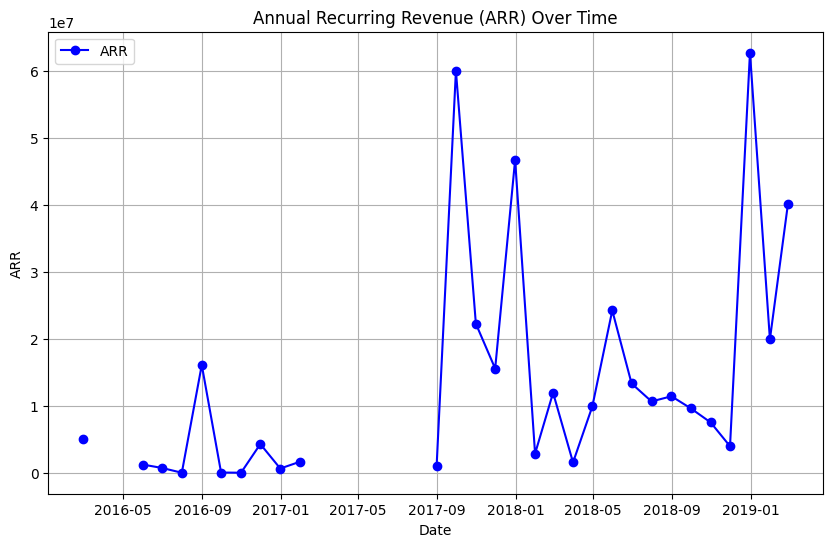

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


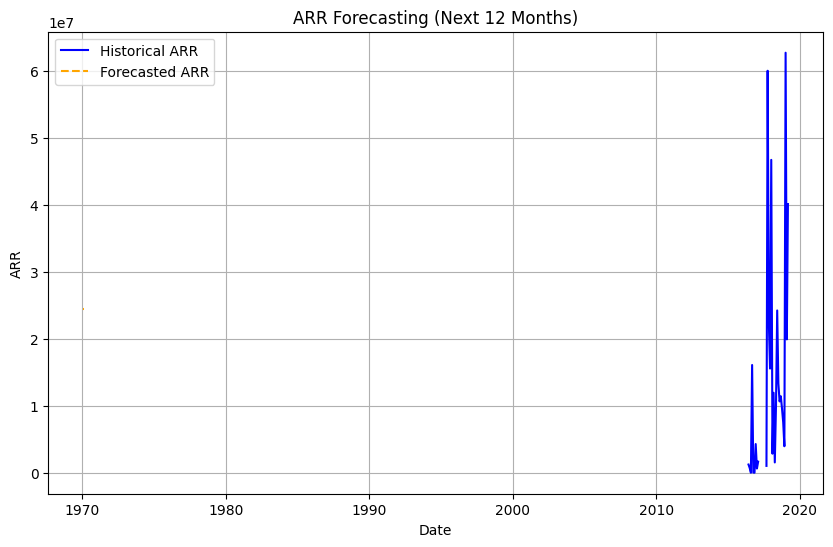


Forecasted ARR for the next 12 months:
29    2.441455e+07
30    2.441455e+07
31    2.441455e+07
32    2.441455e+07
33    2.441455e+07
34    2.441455e+07
35    2.441455e+07
36    2.441455e+07
37    2.441455e+07
38    2.441455e+07
39    2.441455e+07
40    2.441455e+07
dtype: float64
Forecasted data saved as 'arr_forecast.csv'.


In [6]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.api import SimpleExpSmoothing

# Load and Explore the Dataset
file_path = 'latka_web_data.csv'  # This Dataset can be found in Kaggle: https://www.kaggle.com/datasets/gjthompson1/tech-company-data-getlatkacom?resource=download
df = pd.read_csv(file_path)

# Display first few rows to verify structure
print("First few rows of the dataset:")
print(df.head())

# Clean and Prepare the Data
# Focus on columns relevant to ARR
df = df[['financials.created_at', 'financials.arr_max', 'financials.arr_min']]
df = df.dropna()  # Remove rows with missing values

# Convert 'created_at' column to datetime format
df['financials.created_at'] = pd.to_datetime(df['financials.created_at'])
df = df.set_index('financials.created_at')

# Create a new column for the average ARR (midpoint of min and max ARR)
df['ARR'] = (df['financials.arr_max'] + df['financials.arr_min']) / 2

# Resample the data monthly and average the ARR
df_monthly = df['ARR'].resample('M').mean()

# Display the cleaned data
print("\nCleaned and Resampled Data:")
print(df_monthly.head())

# Visualize ARR Trends
plt.figure(figsize=(10, 6))
plt.plot(df_monthly, marker='o', linestyle='-', color='blue', label='ARR')
plt.title("Annual Recurring Revenue (ARR) Over Time")
plt.xlabel("Date")
plt.ylabel("ARR")
plt.legend()
plt.grid()
plt.show()

# Forecast Future ARR Using Simple Exponential Smoothing
# Fit the model
model = SimpleExpSmoothing(df_monthly.dropna()).fit(smoothing_level=0.2, optimized=False)

# Forecast the next 12 months
forecast = model.forecast(12)

# Plot historical ARR and forecast
plt.figure(figsize=(10, 6))
plt.plot(df_monthly, label='Historical ARR', color='blue')
plt.plot(forecast, label='Forecasted ARR', linestyle='--', color='orange')
plt.title("ARR Forecasting (Next 12 Months)")
plt.xlabel("Date")
plt.ylabel("ARR")
plt.legend()
plt.grid()
plt.show()

# Display and Save Results
print("\nForecasted ARR for the next 12 months:")
print(forecast)

# Save the forecast to a CSV file
forecast.to_csv('arr_forecast.csv', header=['Forecasted_ARR'])
print("Forecasted data saved as 'arr_forecast.csv'.")